# **NBA Player Query**


---

- Dependencies Imported to Notebook:

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import json

## Import Player Salary Data

### `Player_Salary` information from [2019-20 NBA Player Contracts](https://www.basketball-reference.com/contracts/players.html)

- Import Player_Salary csv file:

In [2]:
Player_Salary = "data/Player_Salary.csv"

- Read file into Pandas:

In [3]:
Player_Salary_df = pd.read_csv(Player_Salary)
Player_Salary_df.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,"$129,019,086"
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,"$124,076,442"
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,"$123,032,000"
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,"$122,472,000"
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,"$122,472,000"


---
## Import Basic Player Data
### `Player_Basic` information from [NBA Players stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats)

- Import `Player_Basic` data csv file:

In [4]:
Player_Basic = "data/Player_Basic.csv"

- Read file into Pandas:

In [5]:
Player_Basic_df = pd.read_csv(Player_Basic)
Player_Basic_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


- Rename "name" column in order to later merge the tables on the column name **"Player"**:

In [6]:
Player_Basic_df = Player_Basic_df.rename(columns={"name":"Player"})
Player_Basic_df.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


- Check columns of `Player_Basic_df` data:

In [7]:
Player_Basic_df.columns

Index(['Player', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')

- Remove "year_end" column:

In [8]:
Player_Basic_df = Player_Basic_df[['Player','year_start','position', 'height', 'weight',
       'birth_date', 'college']]
Player_Basic_df.head()

,Player,year_start,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,F,6-6,223.0,"November 3, 1974",San Jose State University


---
## Import Player Statistics Data
### `Player_Stats_19` information from [2018-2019 NBA Players Stats](https://www.kaggle.com/terrycheng/2018-nba-players-stats)

- Import `Player_Stats_19` csv file:

In [9]:
Player_Stats_19 = "data/Player_Stats_19.csv"

- Read file into Pandas:

In [10]:
Player_Stats_19_df = pd.read_csv(Player_Stats_19)
Player_Stats_19_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Bobby Portis,WAS,24,50,14,36,26.0,14.2,5.6,12.6,...,8.1,1.4,1.5,0.7,0.4,2.9,27.9,14,0,-2.2
1,Bradley Beal,WAS,26,82,32,50,36.9,25.6,9.3,19.6,...,5.0,5.5,2.7,1.5,0.7,2.8,43.6,11,2,-1.4
2,Chasson Randle,WAS,26,49,19,30,15.2,5.5,1.9,4.4,...,1.1,2.0,0.9,0.5,0.1,1.9,10.7,0,0,-2.2
3,Devin Robinson,WAS,24,7,1,6,13.5,6.7,2.7,4.6,...,2.9,0.9,0.3,0.6,0.9,1.6,15.4,0,0,-1.3
4,Dwight Howard,WAS,33,9,4,5,25.5,12.8,4.8,7.7,...,9.2,0.4,1.8,0.8,0.4,3.8,26.4,3,0,-5.6


- Rename "PLAYER" column to "Player" to later merge tables together on **"Player"**:

In [11]:
Player_Stats_19_df = Player_Stats_19_df.rename(columns={"PLAYER":"Player", "0.625":"3PM"})
Player_Stats_19_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Bobby Portis,WAS,24,50,14,36,26.0,14.2,5.6,12.6,...,8.1,1.4,1.5,0.7,0.4,2.9,27.9,14,0,-2.2
1,Bradley Beal,WAS,26,82,32,50,36.9,25.6,9.3,19.6,...,5.0,5.5,2.7,1.5,0.7,2.8,43.6,11,2,-1.4
2,Chasson Randle,WAS,26,49,19,30,15.2,5.5,1.9,4.4,...,1.1,2.0,0.9,0.5,0.1,1.9,10.7,0,0,-2.2
3,Devin Robinson,WAS,24,7,1,6,13.5,6.7,2.7,4.6,...,2.9,0.9,0.3,0.6,0.9,1.6,15.4,0,0,-1.3
4,Dwight Howard,WAS,33,9,4,5,25.5,12.8,4.8,7.7,...,9.2,0.4,1.8,0.8,0.4,3.8,26.4,3,0,-5.6


- Check `Player_Stats_19_df` columns:

In [12]:
Player_Stats_19_df.columns

Index(['Player', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', 'Plusminus'],
      dtype='object')

- Remove "Team",  "PF", "FP", "DD2", and "TD3" columns from `Player_Stats_19_df`:

In [13]:
Player_Stats_19_df = Player_Stats_19_df[['Player','AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%','3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK','Plusminus']]
Player_Stats_19_df.head()

,Player,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,Plusminus
0,Bobby Portis,24,50,14,36,26.0,14.2,5.6,12.6,44.4,...,1.9,79.4,2.2,5.9,8.1,1.4,1.5,0.7,0.4,-2.2
1,Bradley Beal,26,82,32,50,36.9,25.6,9.3,19.6,47.5,...,5.5,80.8,1.1,3.9,5.0,5.5,2.7,1.5,0.7,-1.4
2,Chasson Randle,26,49,19,30,15.2,5.5,1.9,4.4,41.9,...,1.3,69.4,0.2,0.9,1.1,2.0,0.9,0.5,0.1,-2.2
3,Devin Robinson,24,7,1,6,13.5,6.7,2.7,4.6,59.4,...,2.0,64.3,0.9,2.0,2.9,0.9,0.3,0.6,0.9,-1.3
4,Dwight Howard,33,9,4,5,25.5,12.8,4.8,7.7,62.3,...,5.3,60.4,2.7,6.6,9.2,0.4,1.8,0.8,0.4,-5.6


---
## Merge Tables

- Merge `Player_Salary_df` and `Player_Basic_df` tables on the column, "Player":

In [14]:
df = pd.merge(Player_Salary_df, Player_Basic_df, how = "inner", on = "Player")
df.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed,year_start,position,height,weight,birth_date,college
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,"$129,019,086",2010,G,6-3,190.0,"March 14, 1988",Davidson College
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,"$124,076,442",2006,G,6-0,175.0,"May 6, 1985",Wake Forest University
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,"$123,032,000",2009,G,6-3,200.0,"November 12, 1988","University of California, Los Angeles"
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,"$122,472,000",2011,G,6-4,195.0,"September 6, 1990",University of Kentucky
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,"$122,472,000",2010,G,6-5,220.0,"August 26, 1989",Arizona State University


- Merge `df` (new merged table) with the `Player_Stats_19_df` on the column, **"Player"**:

In [15]:
NBA_19 = pd.merge(df, Player_Stats_19_df, how = "inner", on = "Player")
NBA_19.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,...,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,Plusminus
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6


- Rename columns to remove **special characters, white spaces, and columns starting with a number**:

In [16]:
NBA_19 = NBA_19.rename(columns={"2019-20": "Salary_2019To2020","2020-21":"Salary_2020To2021","2021-22":"Salary_2021To2022", "2022-23":"Salary_2022To2023","2023-24":"Salary_2023To2024","2024-25":"Salary_2024To2025", "Signed Using": "Signed_Using", "FG%": "FG_prc", "3PM": "Three_pnt_m", "3PA": "Three_pnt_a", "3P%": "Three_pnt_prc", "FT%": "FT_prc"})
NBA_19

,Rk,Player,Tm,Salary_2019To2020,Salary_2020To2021,Salary_2021To2022,Salary_2022To2023,Salary_2023To2024,Salary_2024To2025,Signed_Using,...,FTA,FT_prc,OREB,DREB,REB,AST,TOV,STL,BLK,Plusminus
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,415.0,Alfonzo McKinnie,GSW,"$1,588,231",NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,56.3,1.1,2.3,3.4,0.4,0.4,0.3,0.2,0.2
291,455.0,Jonathon Simmons,WAS,"$1,000,000",NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,74.2,0.5,1.8,2.3,2.3,1.2,0.5,0.3,-2.6
292,482.0,Shaun Livingston,GSW,"$666,667","$666,667","$666,666",NaN,NaN,NaN,NaN,...,0.8,78.4,0.7,1.2,1.8,1.8,0.6,0.5,0.4,0.7
293,487.0,Troy Williams,HOU,"$122,741","$122,741","$122,741","$122,741",NaN,NaN,NaN,...,0.7,60.0,0.6,2.2,2.8,0.5,0.4,0.5,0.4,-3.2


- Check names of columns:

In [17]:
NBA_19.columns

Index(['Rk', 'Player', 'Tm', 'Salary_2019To2020', 'Salary_2020To2021',
       'Salary_2021To2022', 'Salary_2022To2023', 'Salary_2023To2024',
       'Salary_2024To2025', 'Signed_Using', 'Guaranteed', 'year_start',
       'position', 'height', 'weight', 'birth_date', 'college', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_prc', 'Three_pnt_m',
       'Three_pnt_a', 'Three_pnt_prc', 'FTM', 'FTA', 'FT_prc', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'Plusminus'],
      dtype='object')

- Change all column names to **lower case** in order for *Pandas* to be uniform with *pgAdmin*:

In [18]:
for column in NBA_19.columns:
    NBA_19 = NBA_19.rename(columns = {column : column.lower()})
NBA_19.head()

,rk,player,tm,salary_2019to2020,salary_2020to2021,salary_2021to2022,salary_2022to2023,salary_2023to2024,salary_2024to2025,signed_using,...,fta,ft_prc,oreb,dreb,reb,ast,tov,stl,blk,plusminus
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6


---
## Connect to pgAdmin

- Connect to PostgreSQL (*pgAdmin*) and create engine:

In [19]:
rds_connection_string = "postgres:postgres@localhost:5432/ETL_project"
engine = create_engine(f'postgresql://{rds_connection_string}')

- Name Table in pgAdmin:

In [20]:
engine.table_names()

['player_info']

- Import table `NBA_19` to PGadmin:

In [21]:
NBA_19.to_sql(name='player_info', con=engine, if_exists='append', index=False)

---
## Pull Query from pgAdmin to Pandas

- Confirm query in **both** *pgAdmin* and *Pandas*:

In [22]:
pd.read_sql_query('select * from player_info', con=engine).head()

,rk,player,tm,salary_2019to2020,salary_2020to2021,salary_2021to2022,salary_2022to2023,salary_2023to2024,salary_2024to2025,signed_using,...,fta,ft_prc,oreb,dreb,reb,ast,tov,stl,blk,plusminus
0,1.0,Stephen Curry,GSW,"$40,231,758","$43,006,362","$45,780,966",None,None,None,Bird Rights,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,2.0,Chris Paul,OKC,"$38,506,482","$41,358,814","$44,211,146",None,None,None,None,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,3.0,Russell Westbrook,HOU,"$38,178,000","$41,006,000","$43,848,000","$46,662,000",None,None,Bird Rights,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,4.0,John Wall,WAS,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",None,None,Bird Rights,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,5.0,James Harden,HOU,"$37,800,000","$40,824,000","$43,848,000","$46,872,000",None,None,Bird Rights,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6


In [23]:
# NBA_19.to_excel("output.xlsx")

In [24]:
# convert birthdate to datetime format
NBA_19['birth_date'] = pd.to_datetime(NBA_19['birth_date'])

In [25]:
# convert height to float64
NBA_19['height'] = [pd.to_numeric(x[:x.index("-")], downcast='float') + pd.to_numeric(x[x.index("-")+1:] , downcast='float')/12  for x in NBA_19['height']]

In [26]:
# convert salary to int
NBA_19['salary_2019to2020']= NBA_19['salary_2019to2020'].str.replace("$","").str.replace(",","").astype(int)

In [27]:
NBA_19

,rk,player,tm,salary_2019to2020,salary_2020to2021,salary_2021to2022,salary_2022to2023,salary_2023to2024,salary_2024to2025,signed_using,...,fta,ft_prc,oreb,dreb,reb,ast,tov,stl,blk,plusminus
0,1.0,Stephen Curry,GSW,40231758,"$43,006,362","$45,780,966",NaN,NaN,NaN,Bird Rights,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,2.0,Chris Paul,OKC,38506482,"$41,358,814","$44,211,146",NaN,NaN,NaN,NaN,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,3.0,Russell Westbrook,HOU,38178000,"$41,006,000","$43,848,000","$46,662,000",NaN,NaN,Bird Rights,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,4.0,John Wall,WAS,37800000,"$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,5.0,James Harden,HOU,37800000,"$40,824,000","$43,848,000","$46,872,000",NaN,NaN,Bird Rights,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,415.0,Alfonzo McKinnie,GSW,1588231,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,56.3,1.1,2.3,3.4,0.4,0.4,0.3,0.2,0.2
291,455.0,Jonathon Simmons,WAS,1000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,74.2,0.5,1.8,2.3,2.3,1.2,0.5,0.3,-2.6
292,482.0,Shaun Livingston,GSW,666667,"$666,667","$666,666",NaN,NaN,NaN,NaN,...,0.8,78.4,0.7,1.2,1.8,1.8,0.6,0.5,0.4,0.7
293,487.0,Troy Williams,HOU,122741,"$122,741","$122,741","$122,741",NaN,NaN,NaN,...,0.7,60.0,0.6,2.2,2.8,0.5,0.4,0.5,0.4,-3.2


In [28]:
NBA_19.columns

Index(['rk', 'player', 'tm', 'salary_2019to2020', 'salary_2020to2021',
       'salary_2021to2022', 'salary_2022to2023', 'salary_2023to2024',
       'salary_2024to2025', 'signed_using', 'guaranteed', 'year_start',
       'position', 'height', 'weight', 'birth_date', 'college', 'age', 'gp',
       'w', 'l', 'min', 'pts', 'fgm', 'fga', 'fg_prc', 'three_pnt_m',
       'three_pnt_a', 'three_pnt_prc', 'ftm', 'fta', 'ft_prc', 'oreb', 'dreb',
       'reb', 'ast', 'tov', 'stl', 'blk', 'plusminus'],
      dtype='object')

In [29]:
mean = NBA_19['age'].mean()
mode = NBA_19['age'].mode()
median = NBA_19['age'].median()
print(mean)
print(median)
print(mode)

27.227118644067797
27.0
0    27
dtype: int64


In [30]:
mean = NBA_19['height'].mean()
mode = NBA_19['height'].mode()
median = NBA_19['height'].median()
print(mean)
print(median)
print(mode)

6.588700564971748
6.583333333333333
0    6.666667
dtype: float64


In [31]:
NBA_19['salary_2019to2020'].max()

40231758

In [32]:
mean = NBA_19['salary_2019to2020'].mean()
mode = NBA_19['salary_2019to2020'].mode()
median = NBA_19['salary_2019to2020'].median()
print(mean)
print(median)
print(mode)

10193413.050847458
6392760.0
0    2564753
dtype: int32


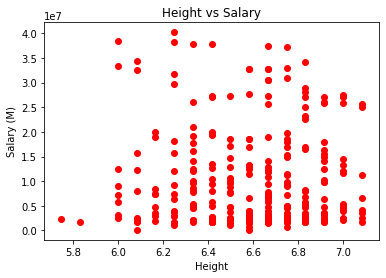

In [33]:
x_axis =NBA_19['height']
y_axis = list(NBA_19['salary_2019to2020'])

plt.title("Height vs Salary")
plt.xlabel("Height")
plt.ylabel("Salary (M)")
plt.scatter(x_axis, y_axis, marker="o", color="red")

plt.show()

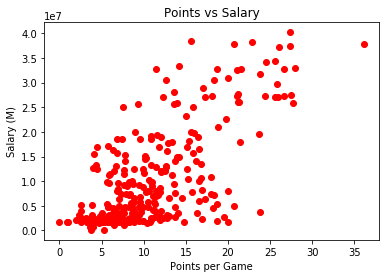

In [34]:
x = NBA_19['pts']
y =  NBA_19['salary_2019to2020']

plt.title("Points vs Salary")
plt.xlabel("Points per Game")
plt.ylabel("Salary (M)")

plt.scatter(x, y, marker="o", color="red")
plt.show()

In [35]:
NBA_19['year_start']

0      2010
1      2006
2      2009
3      2011
4      2010
       ... 
290    2018
291    2016
292    2005
293    2017
294    2017
Name: year_start, Length: 295, dtype: int64

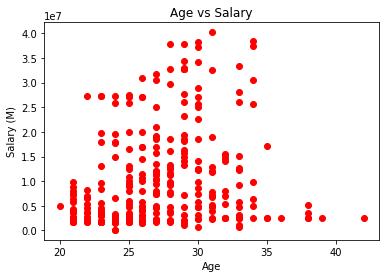

In [36]:
x_axis =NBA_19['age']
height =  NBA_19['salary_2019to2020']

plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary (M)")

plt.scatter(x_axis, height, marker="o", color="red")
plt.show()

In [37]:
# export the file as json
# export = NBA_19.to_json('new_NBA_19.json', orient='records')

In [40]:
# NBA_19.to_csv('testing_notebooks/NBA_19_records.csv')